In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)


# Menggunakan fungsi agg untuk menghitung statistik yang diminta
result = data.groupby(['MarriedID', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean']).reset_index()

# Menampilkan hasil
print(result)


   MarriedID Sex    min   median     max          mean
0          0   F  45046  61605.5  220450  66504.394231
1          0  M   45115  63353.0  178000  70967.939759
2          1   F  45433  62662.0  250000  69638.986111
3          1  M   46120  63370.5  157000  70089.038462


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# Mengelompokkan data berdasarkan kolom 'TermReason' dan menghitung jumlah masing-masing alasan
termination_reasons = data['TermReason'].value_counts()

# Mengambil 5 alasan utama
top_5_termination_reasons = termination_reasons.head(5)

print("Top 5 Reasons for Termination:")
print(top_5_termination_reasons)

Top 5 Reasons for Termination:
N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# Ambang nilai Performance Score
performance_score_threshold = 'Exceeds'

# Filter data berdasarkan Performance Score yang melebihi ambang tertentu
filtered_data = data[data['PerformanceScore'] == performance_score_threshold]

# Menghitung jumlah karyawan untuk setiap sumber perekrutan
employee_count_by_source = filtered_data['RecruitmentSource'].value_counts().reset_index()
employee_count_by_source.columns = ['RecruitmentSource', 'total_recruit']

# Mengurutkan hasil berdasarkan total rekruitmen
employee_count_by_source = employee_count_by_source.sort_values(by='total_recruit', ascending=False)

# Menampilkan hasil
print(employee_count_by_source)

    RecruitmentSource  total_recruit
0              Indeed             12
1            LinkedIn              9
2  Diversity Job Fair              6
3   Employee Referral              5
4       CareerBuilder              2
5       Google Search              2
6             Website              1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
# Mengelompokkan data berdasarkan 'Department' dan menghitung jumlah unik dari 'ManagerName' dalam setiap kelompok
manager_count_by_department = data.groupby('Department')['ManagerName'].nunique().reset_index()

# Menampilkan hasil
print(manager_count_by_department)

             Department  ManagerName
0         Admin Offices            3
1      Executive Office            1
2                 IT/IS            6
3     Production                  10
4                 Sales            4
5  Software Engineering            3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
# Menghitung rasio pemutusan berdasarkan jenis kelamin
termination_ratio_by_gender = data.groupby('Sex')['Termd'].value_counts(normalize=True)

# Menampilkan hasil
print(termination_ratio_by_gender)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

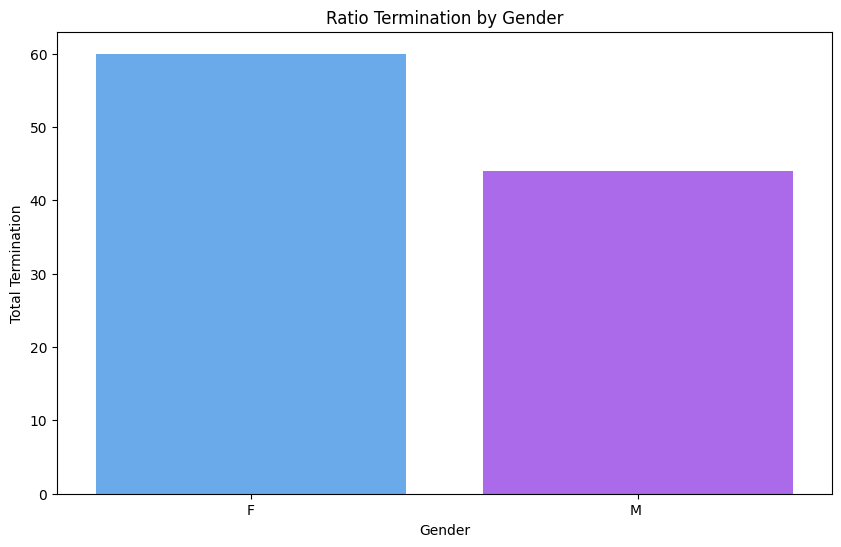

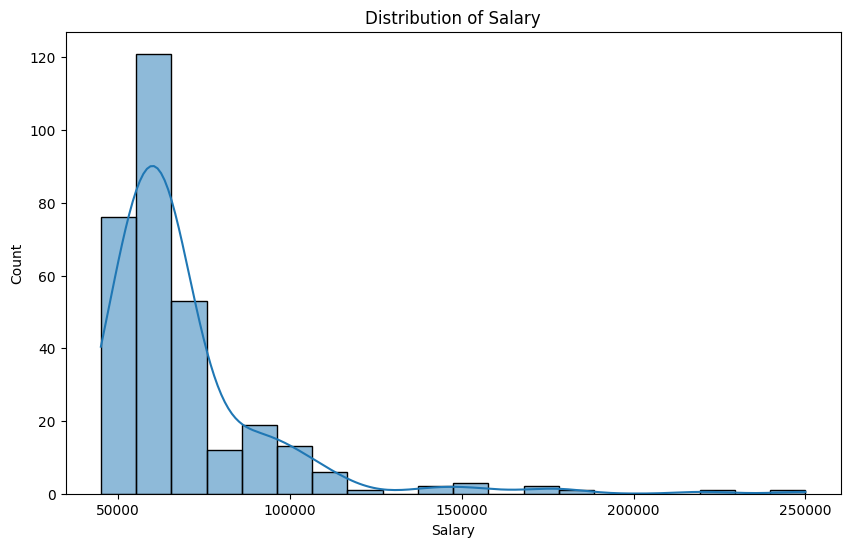

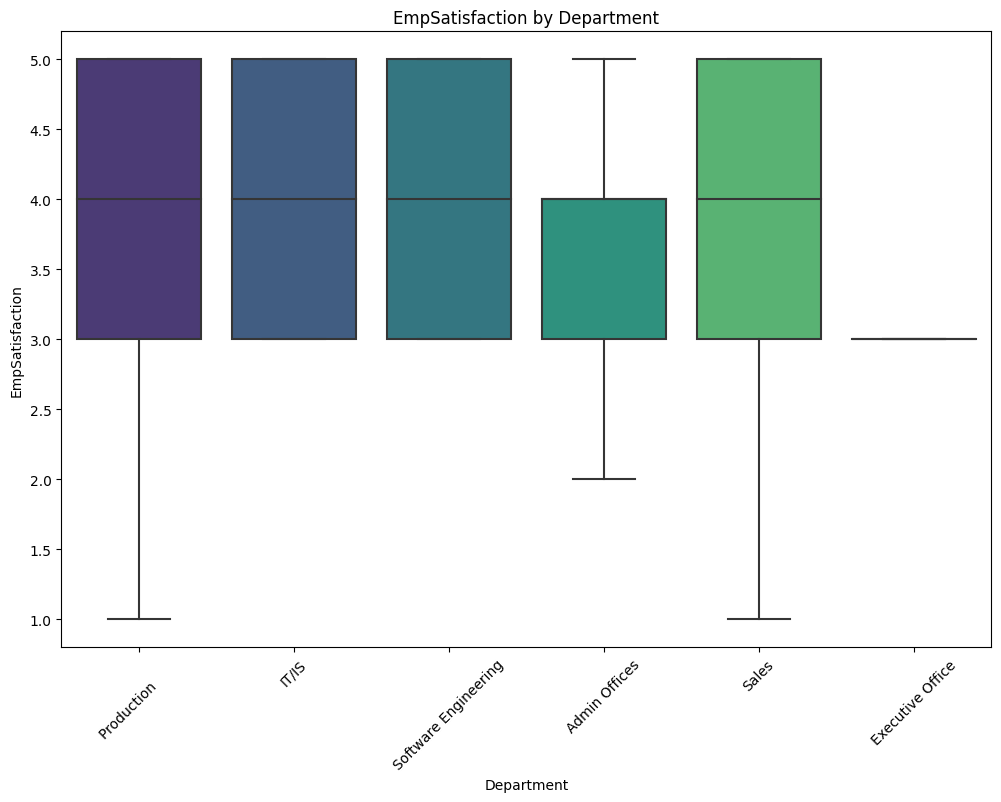

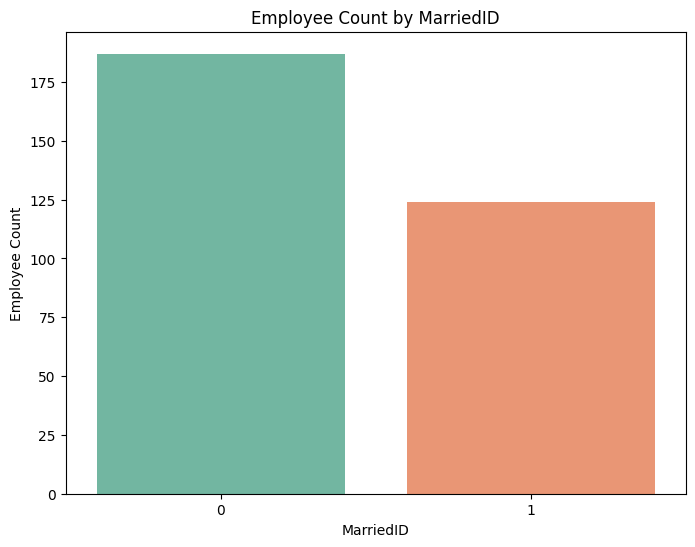

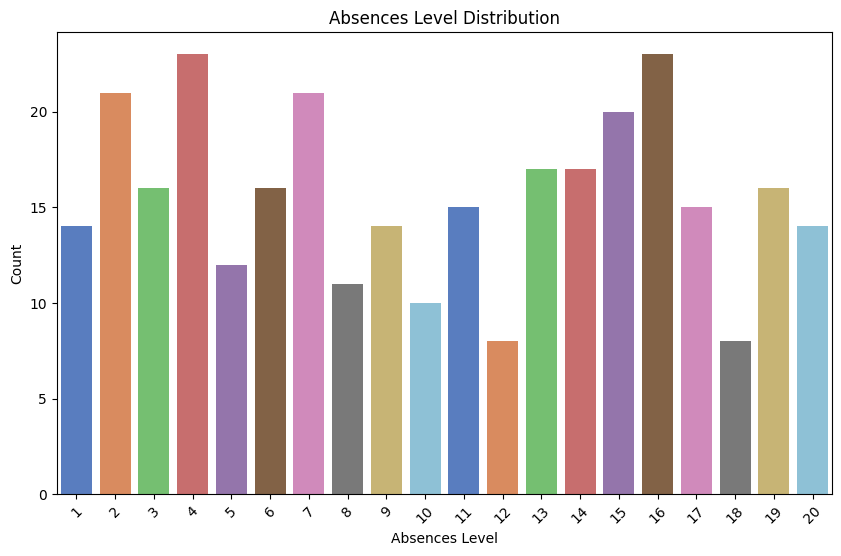

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Mengambil data dari URL
url = 'https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv'
data = pd.read_csv(url)

# Visualisasi 1: Ratio termination by Gender

# Mengelompokkan data berdasarkan Gender dan menghitung total termination
term = data.groupby(by=['Sex'])['Termd'].sum().reset_index()

# Membuat plot bar untuk visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Termd', data=term, palette='cool')
plt.xlabel('Gender')
plt.ylabel('Total Termination')
plt.title('Ratio Termination by Gender')
plt.show()

# Visualisasi 2: Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], bins=20, kde=True)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.show()

# Visualisasi 3: EmpSatisfaction by Department
plt.figure(figsize=(12, 8))
sns.boxplot(x='Department', y='EmpSatisfaction', data=data, palette='viridis')
plt.xlabel('Department')
plt.ylabel('EmpSatisfaction')
plt.title('EmpSatisfaction by Department')
plt.xticks(rotation=45)
plt.show()

# Visualisasi 4: Employee Count by MaritalStatus
plt.figure(figsize=(8, 6))
sns.countplot(x='MarriedID', data=data, palette='Set2')
plt.xlabel('MarriedID')
plt.ylabel('Employee Count')
plt.title('Employee Count by MarriedID')
plt.show()

# Visualisasi 5: Absences Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Absences', data=data, palette='muted')
plt.xlabel('Absences Level')
plt.ylabel('Count')
plt.title('Absences Level Distribution')
plt.xticks(rotation=45)
plt.show()


6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

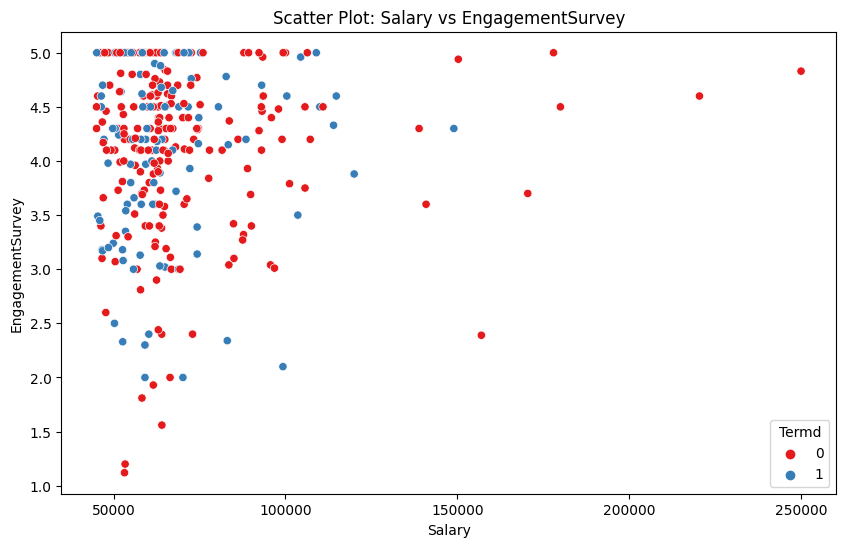

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Membuat scatter plot dengan warna berbeda berdasarkan kolom "Termd"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Salary', y='EngagementSurvey', hue='Termd', palette='Set1')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot: Salary vs EngagementSurvey')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')

# Menampilkan legenda
plt.legend(title='Termd', loc='best')

# Menampilkan plot
plt.show()


7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

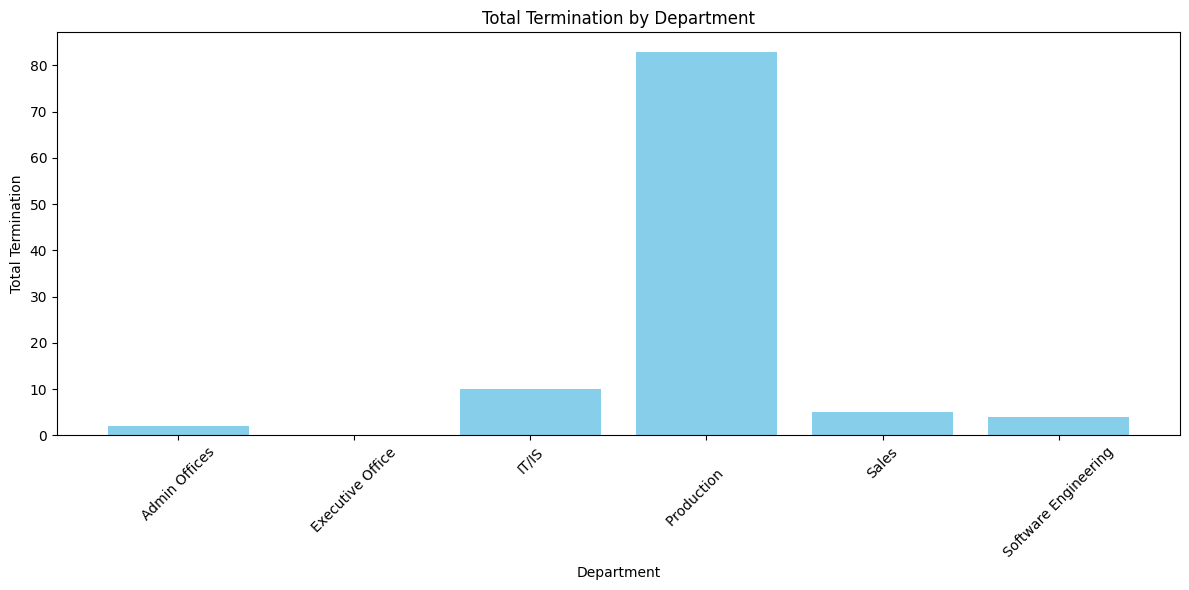

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# Mengelompokkan data berdasarkan Department dan menghitung total termination
termination_by_department = data.groupby(by=['Department'])['Termd'].sum().reset_index()

# Membuat plot bar untuk visualisasi
plt.figure(figsize=(12, 6))
plt.bar(termination_by_department['Department'], termination_by_department['Termd'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Total Termination')
plt.title('Total Termination by Department')
plt.xticks(rotation=45)  # Mengatur label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()






8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

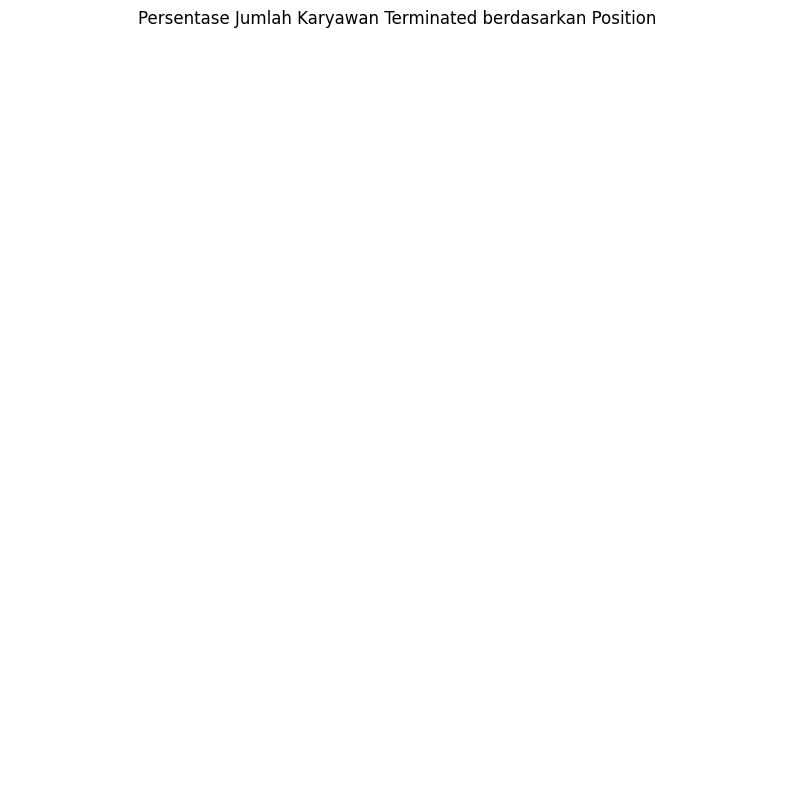

In [13]:
# Mengelompokkan data berdasarkan Position dan menghitung total termination
termination_by_position = data[data['EmploymentStatus'] == 'Terminated'].groupby(by=['Position']).size().reset_index(name='TotalTermination')

# Membuat visualisasi Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(termination_by_position['TotalTermination'], labels=termination_by_position['Position'], autopct='%1.1f%%', startangle=140)
plt.title('Persentase Jumlah Karyawan Terminated berdasarkan Position')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

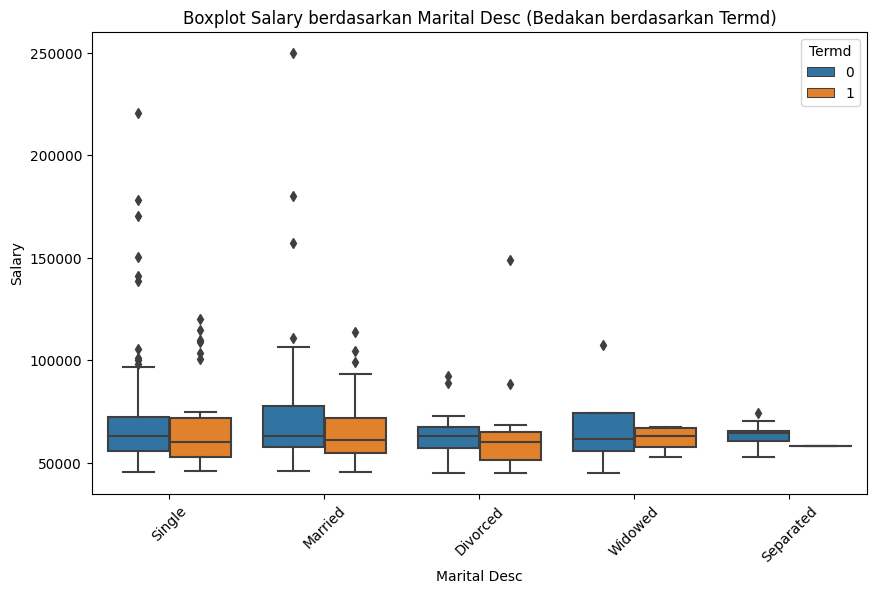

In [ ]:
#code here


# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='MaritalDesc', y='Salary', hue='Termd')
plt.title('Boxplot Salary berdasarkan Marital Desc (Bedakan berdasarkan Termd)')
plt.xlabel('Marital Desc')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.legend(title='Termd', loc='upper right')
plt.show()


10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


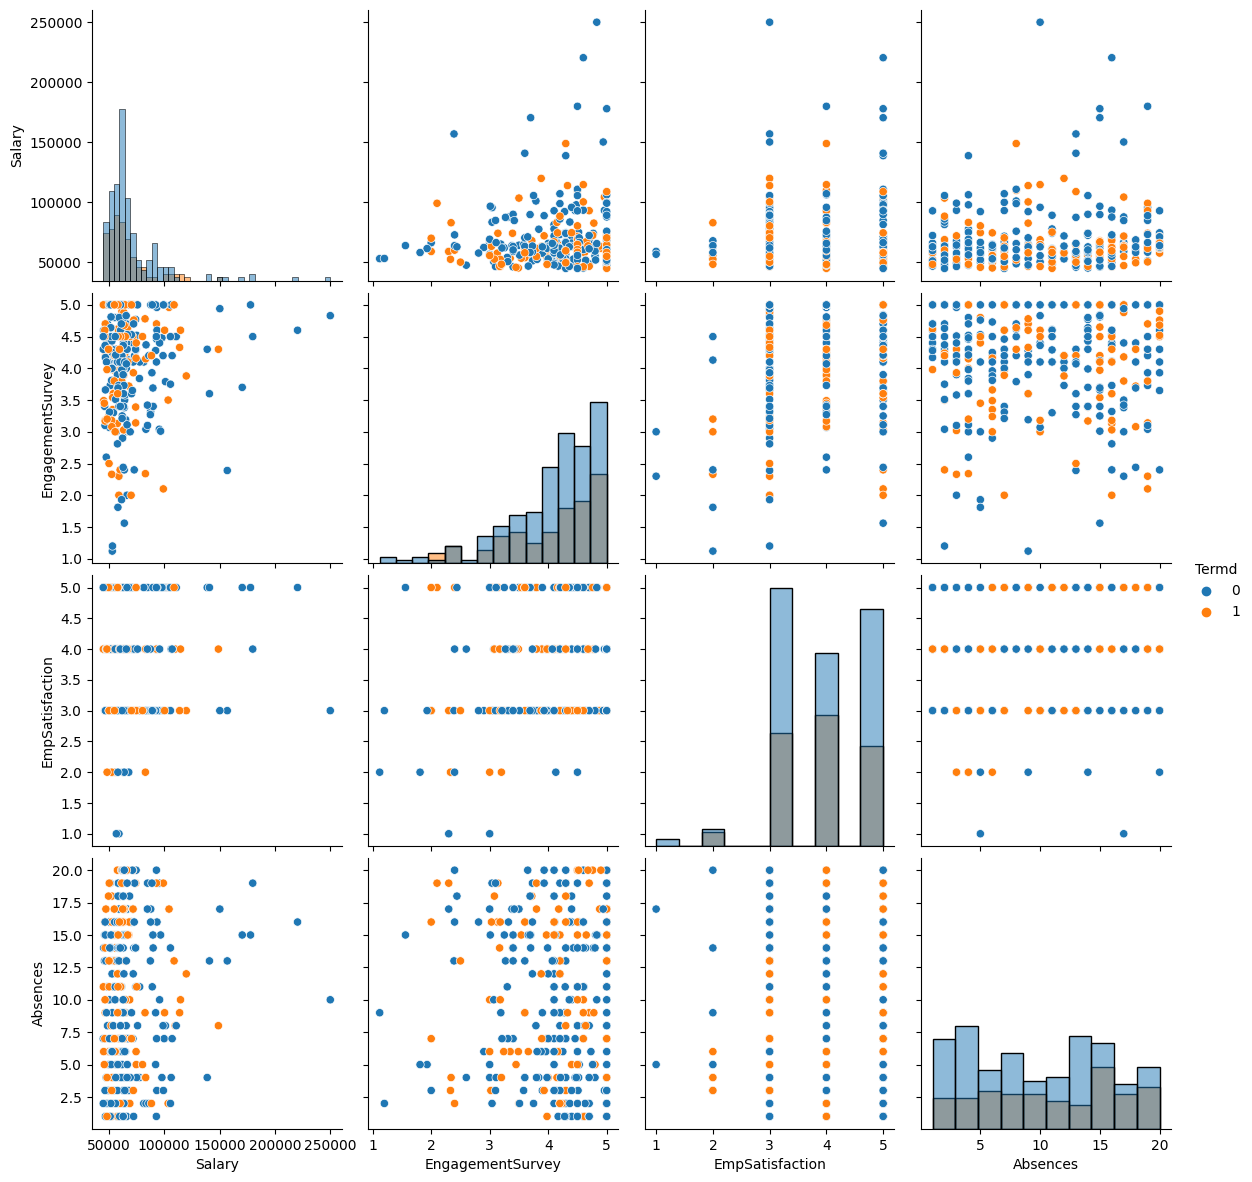

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
# Mengubah format kolom DOB ke tipe datetime
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%y')

# Menghitung umur dalam tahun dengan membandingkan dengan tahun 2022
data['Age'] = 2022 - data['DOB'].dt.year

# Menampilkan 5 baris pertama dari dataframe
print(data.head())


              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

   ManagerID  RecruitmentSource PerformanceScore EngagementSurvey  \
0       22.0     

In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling pada kolom "Salary"
data['Salary_minmax'] = scaler.fit_transform(data[['Salary']])

# Menampilkan hasil
print(data[['Salary', 'Salary_minmax']])

     Salary  Salary_minmax
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
# Daftar kolom yang ingin diubah tipe datanya menjadi category
columns_to_convert = ['Employee_Name', 'Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
                      'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
                      'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
                      'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']

# Mengubah tipe data objek menjadi category
data[columns_to_convert] = data[columns_to_convert].astype('category')

# Mencetak lima baris pertama dari DataFrame yang sudah diubah
print(data.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

   RecruitmentSource  PerformanceScore EngagementSurvey EmpSatisfaction  \
0          

In [ ]:
#Setelah diubah category
# Daftar kolom yang akan diubah menjadi tipe data 'category'
columns_to_convert = ['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
                      'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason',
                      'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
                      'LastPerformanceReview_Date']

# Mengubah tipe data objek menjadi kategori
data[columns_to_convert] = data[columns_to_convert].astype('category')

# Menampilkan informasi tipe data kolom
print(data.dtypes)

Employee_Name                 category
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder
# Menggunakan Label Encoder untuk mengubah kolom "PerformanceScore"
label_encoder = LabelEncoder()
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])

# Menampilkan hasil
print(data.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

   RecruitmentSource  PerformanceScore EngagementSurvey EmpSatisfaction  \
0          

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)


#Independent Variable (feature)
# Pisahkan dependent variable dan independent variable
dependent_variable = data['PerformanceScore']  # Ganti 'PerformanceScore' dengan nama kolom target yang sesuai
independent_variables = data.drop('PerformanceScore', axis=1)  # Hapus kolom target dari data

# Tampilkan hasilnya
print("Dependent Variable (Target):")
print(dependent_variable.head())

print("\nIndependent Variables (Features):")
print(independent_variables.head())

Dependent Variable (Target):
0    0
1    1
2    1
3    1
4    1
Name: PerformanceScore, dtype: int64

Independent Variables (Features):
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5     

In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score
# Membagi data menjadi data pelatihan (Train) dan data pengujian (Test) sebesar 80:20
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Menampilkan lima baris pertama dari data pelatihan
print("Data Pelatihan (Train):")
print(train_data.head())

# Menampilkan lima baris pertama dari data pengujian (Test)
print("\nData Pengujian (Test):")
print(test_data.head())

Data Pelatihan (Train):
        Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
109       Goeth, Amon  10228          1                1         1   
247     Sadki, Nore    10260          0                0         1   
234  Robertson, Peter  10224          1                1         1   
202    Nguyen, Dheepa  10042          0                0         0   
78        Dunn, Amy    10105          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
109            1       3            3                       0   74679  ...   
247            5       5            3                       0   46428  ...   
234            5       5            3                       0   55578  ...   
202            1       6            3                       0   63695  ...   
78             1       5            3                       0   75188  ...   

     RecruitmentSource  PerformanceScore EngagementSurvey EmpSatisfaction  \
109      

In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
# Preprocessing data
# Misalnya, kita akan menggunakan beberapa kolom sebagai fitur (features) yang akan digunakan untuk prediksi.
# Anda dapat menyesuaikan kolom-kolom ini sesuai dengan kebutuhan Anda.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Preprocessing data
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['MaritalDesc'] = le.fit_transform(data['MaritalDesc'])
data['CitizenDesc'] = le.fit_transform(data['CitizenDesc'])

# Bagi data menjadi data pelatihan dan data uji
X = data[['Sex', 'MaritalDesc', 'CitizenDesc']]
y = data['Termd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pilih model (misalnya, Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')


Accuracy: 66.67%
Precision: 100.00%
Recall: 4.55%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

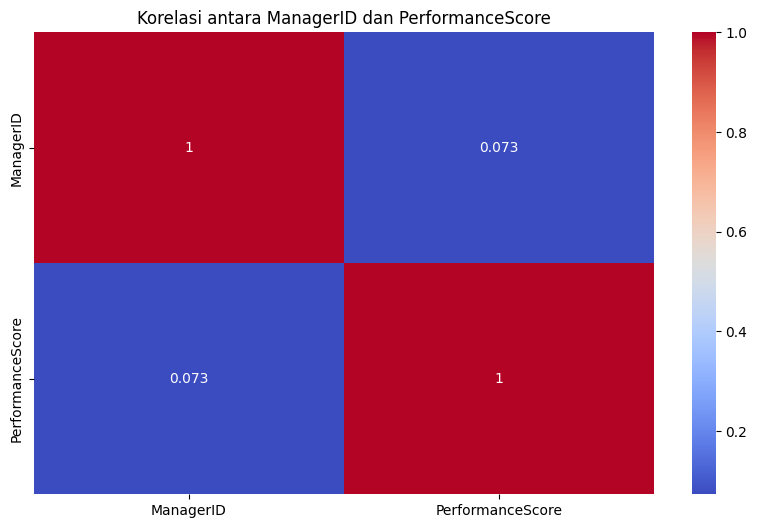

Rasio Pemutusan Hubungan Berdasarkan Sumber Rekrutmen:
RecruitmentSource
Website                    0.076923
Employee Referral          0.161290
LinkedIn                   0.236842
Indeed                     0.241379
CareerBuilder              0.478261
Other                      0.500000
Diversity Job Fair         0.551724
Google Search              0.612245
On-line Web application    1.000000
Name: Termd, dtype: float64

5 Sumber Rekrutmen Terbaik untuk Rasio Pemutusan Hubungan Terendah:
RecruitmentSource
Website              0.076923
Employee Referral    0.161290
LinkedIn             0.236842
Indeed               0.241379
CareerBuilder        0.478261
Name: Termd, dtype: float64


In [ ]:
# Pertanyaan 1: Hubungan antara atasan (manager) dan kinerja (performance score)
# Menggunakan heatmap untuk melihat korelasi antara 'ManagerID' dan 'PerformanceScoreID'
plt.figure(figsize=(10, 6))
heatmap_data = data[['ManagerID', 'PerformanceScore']]
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara ManagerID dan PerformanceScore')
plt.show()

# Pertanyaan 2: Sumber rekrutmen terbaik untuk meminimalkan rasio pemutusan hubungan
# Menghitung rasio pemutusan hubungan berdasarkan sumber rekrutmen
termination_ratio_by_source = data.groupby('RecruitmentSource')['Termd'].mean().sort_values()
print("Rasio Pemutusan Hubungan Berdasarkan Sumber Rekrutmen:")
print(termination_ratio_by_source)

# Menampilkan 5 sumber rekrutmen terbaik dengan rasio pemutusan hubungan terendah
best_recruiting_sources = termination_ratio_by_source.head(5)
print("\n5 Sumber Rekrutmen Terbaik untuk Rasio Pemutusan Hubungan Terendah:")
print(best_recruiting_sources)

Pada kode di atas, saya menggunakan library seaborn untuk menghasilkan sebuah heatmap yang menggambarkan hubungan antara ID manajer dan ID kinerja. Juga melakukan perhitungan untuk mendapatkan rasio pemutusan hubungan berdasarkan sumber rekrutmen dan menampilkan 5 sumber rekrutmen terbaik yang memiliki tingkat pemutusan hubungan yang paling rendah.

Kita dapat menjalankan kode ini pada lingkungan Python untuk mendapatkan hasilnya. Pastikan bahwa telah menginstal library pandas, matplotlib, dan seaborn sebelum menjalankan kode tersebut.